In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle as pk
import joblib as jb
import warnings

### Data Analysis

DataFrame

In [2]:
df = pd.read_csv("Height-Width.csv")
df.head()

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Columns

In [3]:
df.columns

Index(['Height', 'Width'], dtype='object')

Statistical details of the data

In [4]:
df.describe()

,Height,Width
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
df = df.drop(df[df['Width'] < 90].index) # Removed noise

Check for null data

In [6]:
df.isnull().any()

Height    False
Width     False
dtype: bool

### Visualization

Text(0, 0.5, 'Width')

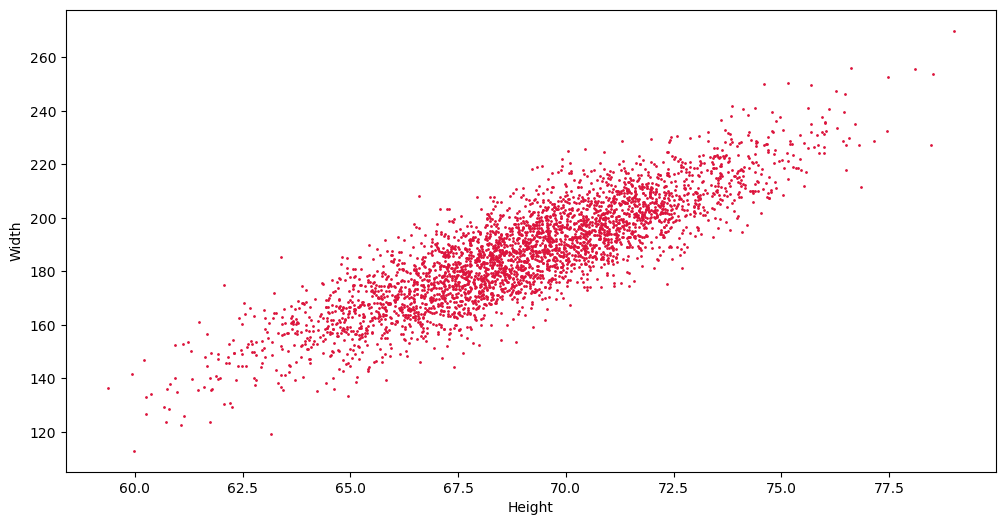

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df.Height, df.Width, s=1, color="crimson")
plt.xlabel("Height")
plt.ylabel("Width")

Splitting the data into training and testing sets

In [8]:
X = df.drop("Width", axis=1)
y = df.Width

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=55)

### Linear Regression

Train model using train data

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Test model using test data

In [10]:
y_pred = model.predict(X_test)

Score

In [11]:
model.score(X_test, y_test)

0.767550343902186

R2 Score

In [12]:
r2_score(y_test,y_pred)

0.767550343902186

Predict input

In [13]:
warnings.filterwarnings("ignore")

In [14]:
model.predict([[85]])

array([281.61609107])

Slope (coefficient) & Intercept

In [15]:
slope = model.coef_
intercept = model.intercept_

print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  [5.92260269]
Intercept:  -221.80513765101102


Create new column with predicted data

In [16]:
df['Predicted Data'] = model.predict(X)
df.head()

,Height,Width,Predicted Data
0,73.847017,241.893563,215.561404
1,68.781904,162.310473,185.562752
2,74.110105,212.740856,217.119572
3,71.730978,220.042470,203.028948
4,69.881796,206.349801,192.076975


### Best Fit Line

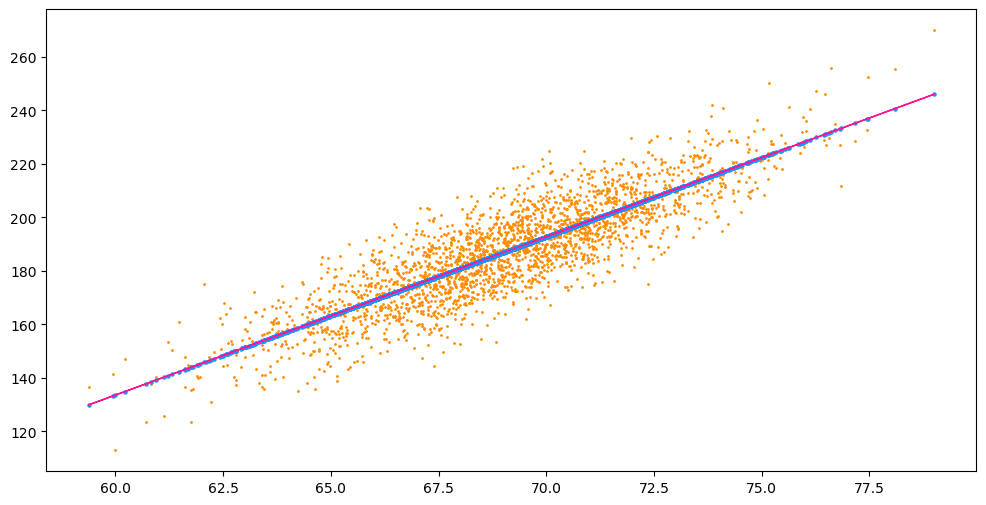

In [17]:
X_train_pred = model.predict(X_train)

plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, s=1, color="darkorange")
plt.scatter(X_train, X_train_pred, s=5, color="dodgerblue")
plt.plot(X_train, X_train_pred, linewidth=1, color="deeppink")

### Errors

In [18]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

Mean absolute error:  7.6303178476659035
Mean squared error:  92.77553888931233


### Save model

Using pickle

In [19]:
pk.dump(model, open("model_pickle","wb"))

In [20]:
mp = pk.load(open("model_pickle","rb"))
mp.predict([[78]])

array([240.15787223])

Using joblib 

In [21]:
jb.dump(model, "model_joblib")

['model_joblib']

In [22]:
mb = jb.load("model_joblib")
mb.predict([[45]])

array([44.71198343])